# Part 1: Web Scraping

In [77]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import random

In [78]:
bibs = [str(i) for i in range(1,55530)]
bibs = random.sample(bibs, 550)
directory = []
for i in bibs:
    driver = webdriver.Chrome()
    url = 'https://results.nyrr.org/event/M2024/result/' + i
    driver.get(url)
    time.sleep(3)
    html_content = driver.page_source
    driver.quit()
    listing = {}
    runners_stat = BeautifulSoup(html_content, 'html.parser')
    
    try:
        listing["Name"] = runners_stat.find_all("div", class_="main-title ng-binding")[0].get_text().split()
        listing["Gender"] = runners_stat.find_all("div", class_="main-title ng-binding")[1].get_text().split()[1][0]
        listing["Age"] = int(runners_stat.find_all("div", class_="main-title ng-binding")[1].get_text().split()[1][1:])
        listing["Pace_Per_Mile"] = runners_stat.find_all("span", class_="label-value ng-binding")[1].get_text()
        listing["05K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[0].find_all('span', class_="label-value ng-binding")[0].get_text() 
        listing["10K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[1].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["15K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[2].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["20K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[3].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["Half"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[4].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["25K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[5].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["30K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[6].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["20M"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[7].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["35K"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[8].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["40K"]= runners_stat.find_all('div', class_="form-group-item ng-scope")[9].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["25.2M"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[10].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["26M"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[11].find_all('span', class_="label-value ng-binding")[0].get_text()
        listing["Finish_Time"] = runners_stat.find_all('div', class_="form-group-item ng-scope")[12].find_all('span', class_="label-value ng-binding")[0].get_text()
        directory.append(listing)
    
    except:
        continue
    

# Part 2: Importing data into a Database

In [147]:
import pandas as pd

In [148]:
df = pd.DataFrame(directory)
df.head()

,Name,Gender,Age,Pace_Per_Mile,05K,10K,15K,20K,Half,25K,30K,20M,35K,40K,25.2M,26M,Finish_Time
0,"[Frances, Fontaine, Chedid]",W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54
1,"[Eric, Maki]",M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12
2,"[Chuan, Zhu]",W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22
3,"[Suresh, Jatti]",M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17
4,"[Brad, Holowaychuk]",M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53


In [149]:
# Function to split the names based on the condition
def split_names(name_list):
    if len(name_list) > 2:
        first_name = ' '.join(name_list[:2])  # Join the first two names as the first name
        last_name = name_list[-1]  # Last name is the last value in the list
    else:
        first_name = name_list[0]  # First name is the first element if only two names
        last_name = name_list[1]  # Last name is the second element

    return first_name, last_name

# Apply the function to the 'Name' column
df[['First Name', 'Last Name']] = df['Name'].apply(lambda x: pd.Series(split_names(x)))

# Drop the original 'Name' column if no longer needed
df.drop('Name', axis=1, inplace=True)



In [150]:
df.head()

,Gender,Age,Pace_Per_Mile,05K,10K,15K,20K,Half,25K,30K,20M,35K,40K,25.2M,26M,Finish_Time,First Name,Last Name
0,W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54,Frances Fontaine,Chedid
1,M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12,Eric,Maki
2,W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22,Chuan,Zhu
3,M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17,Suresh,Jatti
4,M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53,Brad,Holowaychuk


In [151]:
new_column_order = ['First Name', 'Last Name', 'Gender', 'Age', 'Pace_Per_Mile', '05K', '10K','15K','20K','Half','25K','30K','20M','35K','40K','25.2M','26M','Finish_Time']
df = df[new_column_order]
df.head()

,First Name,Last Name,Gender,Age,Pace_Per_Mile,05K,10K,15K,20K,Half,25K,30K,20M,35K,40K,25.2M,26M,Finish_Time
0,Frances Fontaine,Chedid,W,38,10:59,0:31:56,1:04:05,1:36:31,2:09:30,2:16:49,2:43:02,3:16:39,3:33:12,3:57:26,4:33:10,4:37:09,4:46:02,4:47:54
1,Eric,Maki,M,63,07:36,0:21:55,0:43:40,1:05:49,1:28:35,1:33:43,1:52:19,2:15:32,2:26:06,2:40:19,3:07:19,3:10:31,3:17:30,3:19:12
2,Chuan,Zhu,W,54,10:17,0:34:41,1:05:51,1:37:25,2:08:32,2:15:42,2:40:51,3:12:03,3:26:10,3:44:22,4:16:07,4:19:40,4:27:16,4:29:22
3,Suresh,Jatti,M,55,07:07,0:21:47,0:44:02,1:06:22,1:28:22,1:33:20,1:51:07,2:13:02,2:22:36,2:34:57,2:56:42,2:59:09,3:04:43,3:06:17
4,Brad,Holowaychuk,M,46,06:18,0:18:36,0:37:14,0:56:08,1:15:25,1:19:47,1:35:30,1:54:53,2:03:52,2:15:18,2:35:56,2:38:14,2:43:25,2:44:53


In [138]:
import sqlite3


# Create a connection to the SQLite database
conn = sqlite3.connect('runners_data.db')

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Create the table to match the data structure
cursor.execute('''
    CREATE TABLE IF NOT EXISTS runner_details (
        id INTEGER PRIMARY KEY,
        first_name TEXT,
        last_name TEXT,
        gender TEXT,
        age INTEGER,
        pace_per_mile TEXT,
        five_k TEXT,
        ten_k TEXT,
        fifteen_k TEXT,
        twenty_k TEXT,
        half_marathon TEXT,
        twenty_five_k TEXT,
        thirty_k TEXT,
        twenty_miles TEXT,
        thirty_five_k TEXT,
        forty_k TEXT,
        twenty_five_point_two_m TEXT,
        twenty_six_m TEXT,
        finish_time TEXT
    )
''')

# Insert data from pandas DataFrame into the database
for _, row in df.iterrows():
    cursor.execute('''
        INSERT INTO runner_details (
            first_name, last_name, gender, age, pace_per_mile, five_k, ten_k, fifteen_k, 
            twenty_k, half_marathon, twenty_five_k, thirty_k, twenty_miles, thirty_five_k, 
            forty_k, twenty_five_point_two_m, twenty_six_m, finish_time
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', tuple(row))

# Commit the changes
conn.commit()

# Query the database to see the inserted data
cursor.execute('SELECT * FROM runner_details')

# Fetch all rows from the query result
rows = cursor.fetchall()

# Print the rows
for row in rows:
    print(row)

# Close the connection
conn.close()


(1, 'Frances Fontaine', 'Chedid', 'W', 38, '10:59', '0:31:56', '1:04:05', '1:36:31', '2:09:30', '2:16:49', '2:43:02', '3:16:39', '3:33:12', '3:57:26', '4:33:10', '4:37:09', '4:46:02', '4:47:54')
(2, 'Eric', 'Maki', 'M', 63, '07:36', '0:21:55', '0:43:40', '1:05:49', '1:28:35', '1:33:43', '1:52:19', '2:15:32', '2:26:06', '2:40:19', '3:07:19', '3:10:31', '3:17:30', '3:19:12')
(3, 'Chuan', 'Zhu', 'W', 54, '10:17', '0:34:41', '1:05:51', '1:37:25', '2:08:32', '2:15:42', '2:40:51', '3:12:03', '3:26:10', '3:44:22', '4:16:07', '4:19:40', '4:27:16', '4:29:22')
(4, 'Suresh', 'Jatti', 'M', 55, '07:07', '0:21:47', '0:44:02', '1:06:22', '1:28:22', '1:33:20', '1:51:07', '2:13:02', '2:22:36', '2:34:57', '2:56:42', '2:59:09', '3:04:43', '3:06:17')
(5, 'Brad', 'Holowaychuk', 'M', 46, '06:18', '0:18:36', '0:37:14', '0:56:08', '1:15:25', '1:19:47', '1:35:30', '1:54:53', '2:03:52', '2:15:18', '2:35:56', '2:38:14', '2:43:25', '2:44:53')
(6, 'Noah', 'Simpson', 'M', 27, '07:58', '0:23:54', '0:45:15', '1:06:50

# Analyzing the Data

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score

# Sample data (similar to your provided data)


# Convert 'Pace_Per_Mile' to minutes as a float (e.g., '10:59' -> 10.9833)
def pace_to_float(pace):
    minutes, seconds = pace.split(':')
    return int(minutes) + int(seconds) / 60.0

df['Pace_Per_Mile'] = df['Pace_Per_Mile'].apply(pace_to_float)

# Convert Gender to a categorical variable for easy plotting
df['Gender'] = df['Gender'].map({'M': 'Male', 'W': 'Female'})

# Split data into features and target for Gender prediction
X = df[['Pace_Per_Mile']]
y_gender = df['Gender']

# Encode gender for classification
label_encoder = LabelEncoder()
y_gender_encoded = label_encoder.fit_transform(y_gender)

# Split data for training and testing
X_train, X_test, y_train_gender, y_test_gender = train_test_split(X, y_gender_encoded, test_size=0.2, random_state=42)

# Define models for gender prediction (classification)
models_gender = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(kernel='linear'),
}

# Train models and evaluate for gender prediction
gender_results = []
for name, model in models_gender.items():
    model.fit(X_train, y_train_gender)
    y_pred_gender = model.predict(X_test)
    accuracy = accuracy_score(y_test_gender, y_pred_gender)
    gender_results.append({
        'Model': name,
        'Accuracy': accuracy
    })

# Now, train models for Pace per minute prediction (regression)
y_pace = df['Pace_Per_Mile']
X_train, X_test, y_train_pace, y_test_pace = train_test_split(X, y_pace, test_size=0.2, random_state=42)

# Define models for pace prediction (regression)
models_pace = {
    'Random Forest (Regressor)': RandomForestRegressor(),
    'Linear Regression': LogisticRegression(),  # Used as regressor for simplicity
}

# Train models and evaluate for pace prediction
pace_results = []
for name, model in models_pace.items():
    model.fit(X_train, y_train_pace)
    y_pred_pace = model.predict(X_test)
    mse = mean_squared_error(y_test_pace, y_pred_pace)
    pace_results.append({
        'Model': name,
        'MSE': mse
    })

# Visualize the results
gender_df = pd.DataFrame(gender_results)
pace_df = pd.DataFrame(pace_results)

# Create interactive bar plots for gender accuracy and pace MSE
fig_gender = sns.barplot(x='Model', y='Accuracy', data=gender_df)
fig_gender.set_title('Gender Prediction Accuracy by Model')
fig_gender.set_ylabel('Accuracy')

fig_pace = sns.barplot(x='Model', y='MSE', data=pace_df)
fig_pace.set_title('Pace Prediction MSE by Model')
fig_pace.set_ylabel('MSE')

plt.show()


AttributeError: 'float' object has no attribute 'split'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


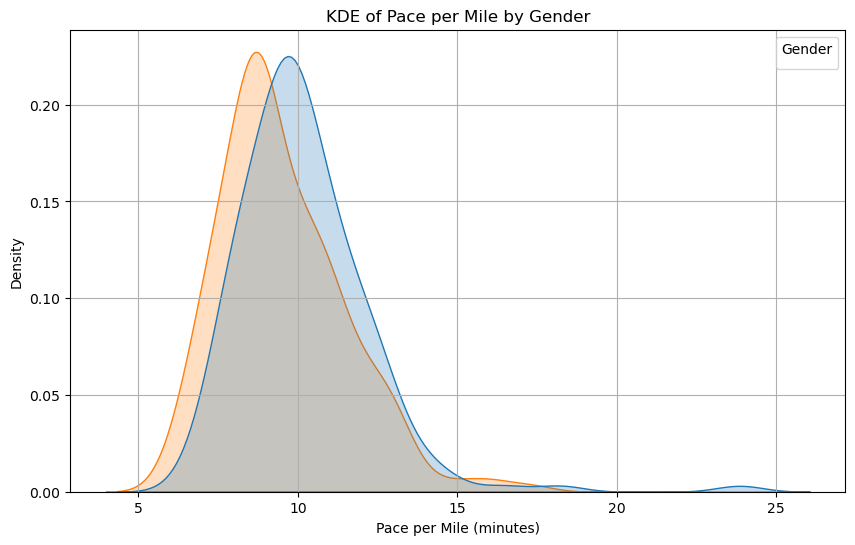

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt


df = df.drop('Gender_encoded', axis=1)
# Convert Gender to a categorical variable for easy plotting
df['Gender'] = df['Gender'].map({'M': 'Male', 'W': 'Female'})

# Plot KDE (Kernel Density Estimate) for Pace_Per_Mile by Gender
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Pace_Per_Mile', hue='Gender', fill=True, common_norm=False)

# Customize the plot
plt.title('KDE of Pace per Mile by Gender')
plt.xlabel('Pace per Mile (minutes)')
plt.ylabel('Density')
plt.legend(title='Gender')
plt.grid(True)

# Show the plot
plt.show()


In [130]:
type(df['05K'][0])

str